# E5. Detección de Anomalías en Series Temporales utilizando Métodos Estadísticos

En este Notebook se muestra cómo aplicar técnicas estadísticas básicas, como las medias móviles, z-scores y percentiles, para detectar anomalías en una serie temporal. Se utilizará un dataset simulado para ejemplificar cada uno de los métodos.

## 1. Importación de Librerías y Creación del Dataset

En esta sección, importamos las librerías necesarias y generamos un dataset simulado que representa, por ejemplo, el consumo energético mensual (en kWh) con algunos valores atípicos.

Vista previa del dataset:


,Consumo_kWh
Fecha,
2020-01-31,209.934283
2020-02-29,197.234714
2020-03-31,212.953771
2020-04-30,230.460597
2020-05-31,195.316933
2020-06-30,300.000000
2020-07-31,231.584256
2020-08-31,215.348695
2020-09-30,190.610512


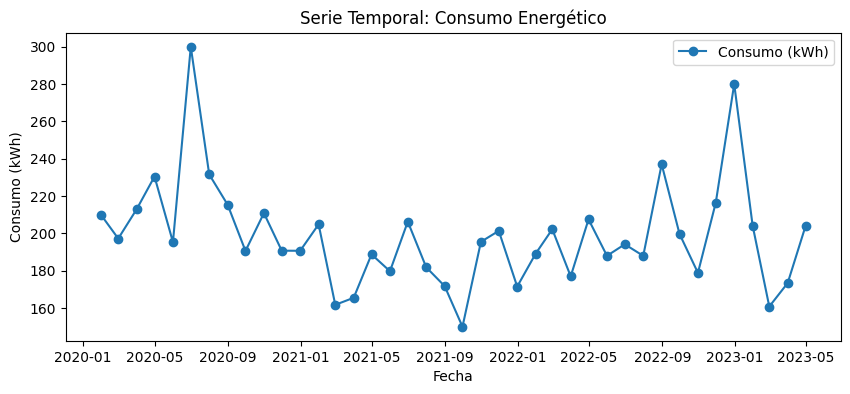

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración de estilo para gráficos
# plt.style.use('seaborn')

# Generar dataset simulado
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=40, freq='ME')
consumo = np.random.normal(loc=200, scale=20, size=len(dates))

# Introducimos algunas anomalías
consumo[5] = 300
consumo[20] = 150
consumo[35] = 280

df = pd.DataFrame({'Fecha': dates, 'Consumo_kWh': consumo})
df.set_index('Fecha', inplace=True)

print('Vista previa del dataset:')
display(df.head(10))

# Visualización de la serie temporal
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Consumo_kWh'], marker='o', label='Consumo (kWh)')
plt.title('Serie Temporal: Consumo Energético')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()

## 2. Detección de Anomalías con Medias Móviles

El método de la media móvil suaviza la serie y permite identificar desviaciones significativas respecto a la tendencia local.

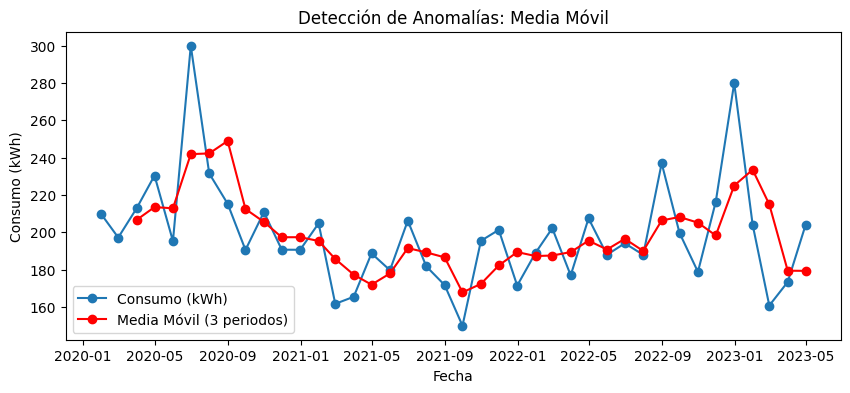

In [14]:
# Calcular la media móvil (ventana de 3 periodos)
df['Media_Movil'] = df['Consumo_kWh'].rolling(window=3).mean()

# Visualización comparativa
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Consumo_kWh'], marker='o', label='Consumo (kWh)')
plt.plot(df.index, df['Media_Movil'], marker='o', label='Media Móvil (3 periodos)', color='red')
plt.title('Detección de Anomalías: Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()

## 3. Detección de Anomalías con Z-Scores

Los z-scores miden cuántas desviaciones estándar se aleja un dato de la media. Valores absolutos altos indican anomalías.

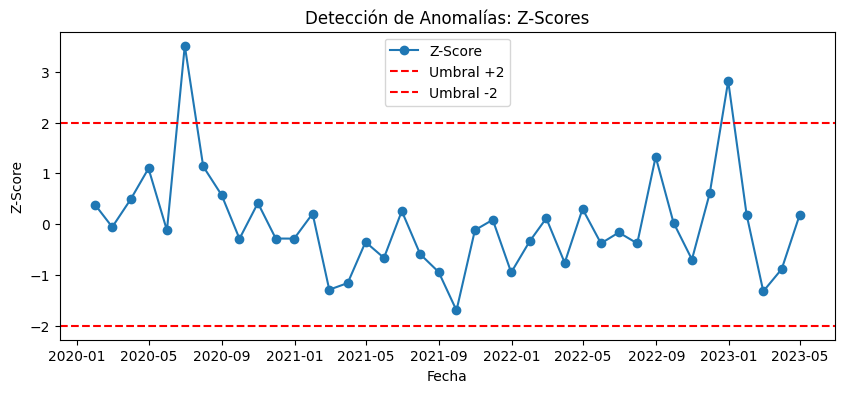

In [15]:
# Calcular la media y la desviación estándar
mean_val = df['Consumo_kWh'].mean()
std_val = df['Consumo_kWh'].std()

# Calcular z-score para cada valor
df['Z_Score'] = (df['Consumo_kWh'] - mean_val) / std_val

# Definir umbral para considerar una anomalía (por ejemplo, |z| > 2)
umbral = 2
df['Anomalia_Z'] = df['Z_Score'].abs() > umbral

# Visualización de los z-scores
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Z_Score'], marker='o', label='Z-Score')
plt.axhline(umbral, color='red', linestyle='--', label='Umbral +2')
plt.axhline(-umbral, color='red', linestyle='--', label='Umbral -2')
plt.title('Detección de Anomalías: Z-Scores')
plt.xlabel('Fecha')
plt.ylabel('Z-Score')
plt.legend()
plt.show()

In [16]:
print('Datos con z-scores:')
display(df[['Consumo_kWh', 'Z_Score', 'Anomalia_Z']])

Datos con z-scores:


,Consumo_kWh,Z_Score,Anomalia_Z
Fecha,,,
2020-01-31,209.934283,0.384402,False
2020-02-29,197.234714,-0.056891,False
2020-03-31,212.953771,0.489325,False
2020-04-30,230.460597,1.097664,False
2020-05-31,195.316933,-0.123531,False
2020-06-30,300.000000,3.514065,True
2020-07-31,231.584256,1.136710,False
2020-08-31,215.348695,0.572546,False
2020-09-30,190.610512,-0.287073,False


## 4. Detección de Anomalías con Percentiles

El uso de percentiles permite identificar valores extremos comparándolos con el resto de la distribución. Aquí se utiliza el percentil 5 y 95 para definir los límites inferiores y superiores.

Percentil 5: 161.69 kWh, Percentil 95: 239.19 kWh


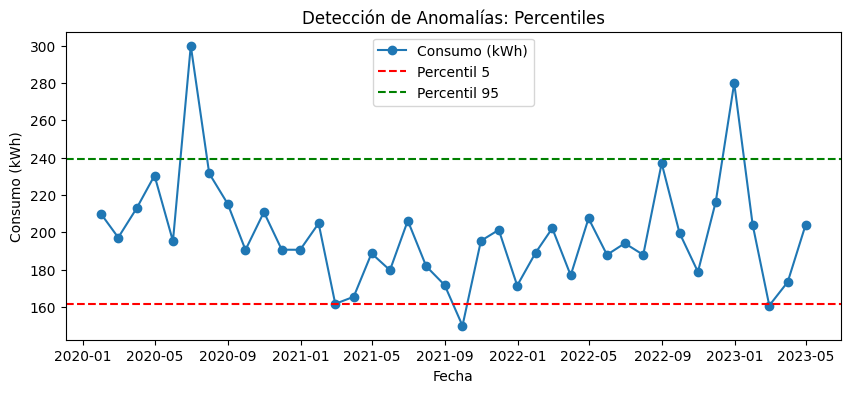

In [17]:
# Calcular los percentiles 5 y 95
p5 = np.percentile(df['Consumo_kWh'], 5)
p95 = np.percentile(df['Consumo_kWh'], 95)

print(f'Percentil 5: {p5:.2f} kWh, Percentil 95: {p95:.2f} kWh')

# Marcar los valores que se encuentren fuera de estos rangos
df['Anomalia_Percentil'] = (df['Consumo_kWh'] < p5) | (df['Consumo_kWh'] > p95)

# Visualización de los percentiles y las anomalías
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Consumo_kWh'], marker='o', label='Consumo (kWh)')
plt.axhline(p5, color='red', linestyle='--', label='Percentil 5')
plt.axhline(p95, color='green', linestyle='--', label='Percentil 95')
plt.title('Detección de Anomalías: Percentiles')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()

In [18]:
display(df[['Consumo_kWh', 'Anomalia_Percentil']])

,Consumo_kWh,Anomalia_Percentil
Fecha,,
2020-01-31,209.934283,False
2020-02-29,197.234714,False
2020-03-31,212.953771,False
2020-04-30,230.460597,False
2020-05-31,195.316933,False
2020-06-30,300.000000,True
2020-07-31,231.584256,False
2020-08-31,215.348695,False
2020-09-30,190.610512,False


## 5. Detección de Anomalías con IQR

1. Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) de la serie.
2. Determina el rango intercuartílico:
$$
\text{IQR} = Q3 - Q1
$$
3. Define los límites inferior y superior:  
   - Límite inferior: 
   $$
   Q1 - 1.5 \times \text{IQR}
   $$
   - Límite superior:
   $$
   Q3 + 1.5 \times \text{IQR}
   $$
4. Identificar como anomalías los datos que caen fuera de estos límites.

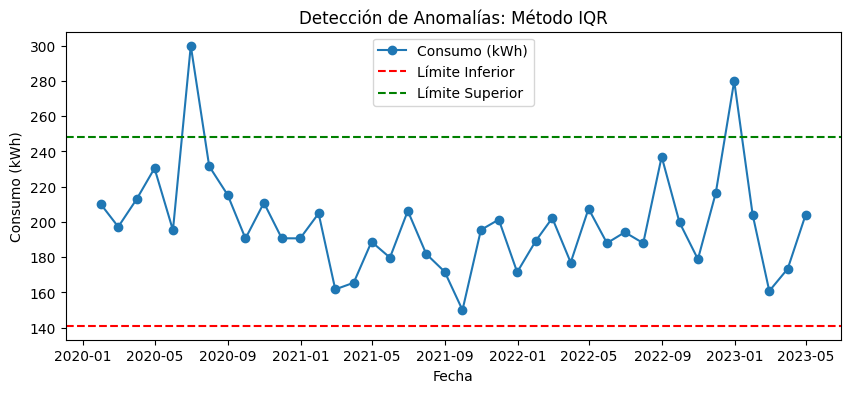

In [19]:
# Calcular Q1, Q3 e IQR
Q1 = df['Consumo_kWh'].quantile(0.25)
Q3 = df['Consumo_kWh'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Marcar las anomalías basadas en IQR
df['Anomalia_IQR'] = (df['Consumo_kWh'] < limite_inferior) | (df['Consumo_kWh'] > limite_superior)

# Visualización de la detección de anomalías con IQR
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Consumo_kWh'], marker='o', label='Consumo (kWh)')
plt.axhline(limite_inferior, color='red', linestyle='--', label='Límite Inferior')
plt.axhline(limite_superior, color='green', linestyle='--', label='Límite Superior')
plt.title('Detección de Anomalías: Método IQR')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()


In [20]:
print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)
display(df[['Consumo_kWh', 'Anomalia_IQR']])

Límite inferior: 141.11014660341237
Límite superior: 248.3243777023386


,Consumo_kWh,Anomalia_IQR
Fecha,,
2020-01-31,209.934283,False
2020-02-29,197.234714,False
2020-03-31,212.953771,False
2020-04-30,230.460597,False
2020-05-31,195.316933,False
2020-06-30,300.000000,True
2020-07-31,231.584256,False
2020-08-31,215.348695,False
2020-09-30,190.610512,False


## 5. Conclusiones

En este Notebook se han aplicado tres métodos estadísticos para detectar anomalías en una serie temporal:

- **Medias Móviles:** Permiten suavizar la serie y detectar desviaciones respecto a la tendencia local.
- **Z-Scores:** Ayudan a identificar valores que se desvían significativamente de la media.
- **Percentiles:** Permiten definir límites basados en la distribución de los datos para identificar valores extremos.

**Tabla Comparativa**

| Método        | Ventajas                                               | Consideraciones                                      |
|---------------|---------------------------------------------------------|------------------------------------------------------|
| Media Móvil   | Suaviza ruido y facilita ver tendencias locales.        | Puede retrasar la detección de cambios bruscos.      |
| Z-Scores      | Rápido y sencillo, permite definir umbrales claros.      | Sensible a la presencia de outliers extremos.        |
| Percentiles   | Basado en la distribución real de los datos.            | Requiere un análisis previo de la distribución.      |
| IQR           | Robusto ante outliers; basado en cuartiles.             | Puede no detectar anomalías en distribuciones simétricas.|


**Consideraciones Finales**

La elección del método dependerá de la naturaleza de los datos y el objetivo del análisis.
En ocasiones, la combinación de varios métodos puede ofrecer una detección más robusta de anomalías.